[OK] Unzipped: /content/archive.zip -> /content/data
[OK] Located data folder: /content/data/archive/A_DeviceMotion_data/A_DeviceMotion_data
[Load] DWS -> /content/data/archive/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_1.csv


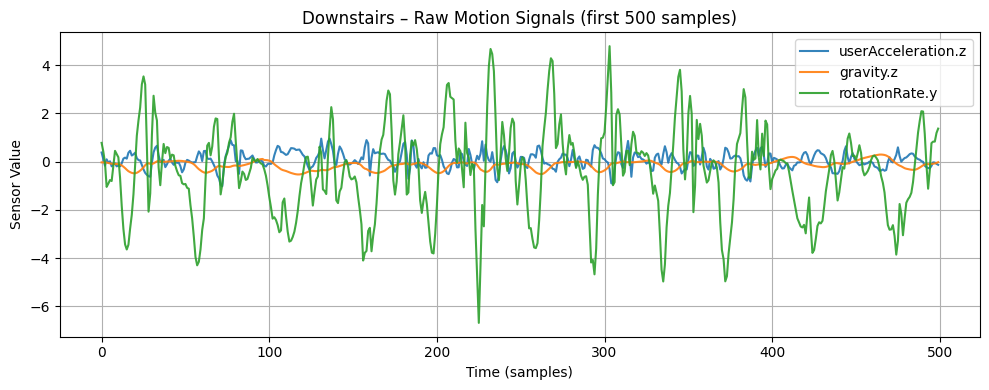

[Saved] /content/dws_plot.png
[Load] UPS -> /content/data/archive/A_DeviceMotion_data/A_DeviceMotion_data/ups_12/sub_1.csv


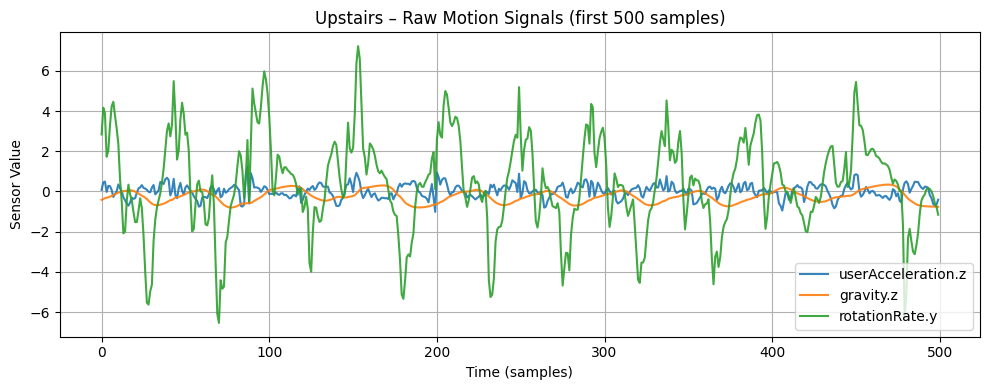

[Saved] /content/ups_plot.png
[Load] WLK -> /content/data/archive/A_DeviceMotion_data/A_DeviceMotion_data/wlk_15/sub_1.csv


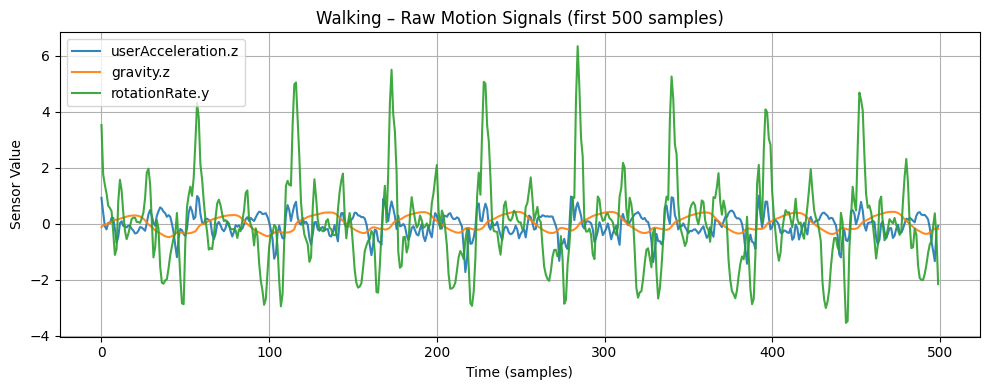

[Saved] /content/wlk_plot.png
[Load] JOG -> /content/data/archive/A_DeviceMotion_data/A_DeviceMotion_data/jog_16/sub_1.csv


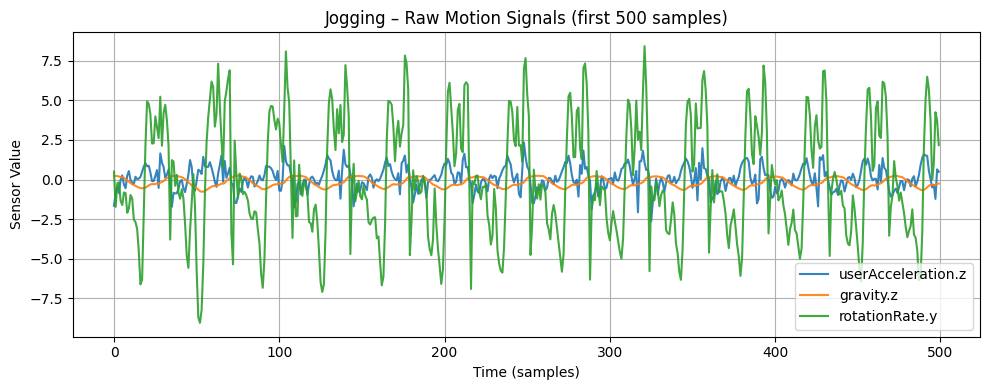

[Saved] /content/jog_plot.png
[Load] SIT -> /content/data/archive/A_DeviceMotion_data/A_DeviceMotion_data/sit_13/sub_1.csv


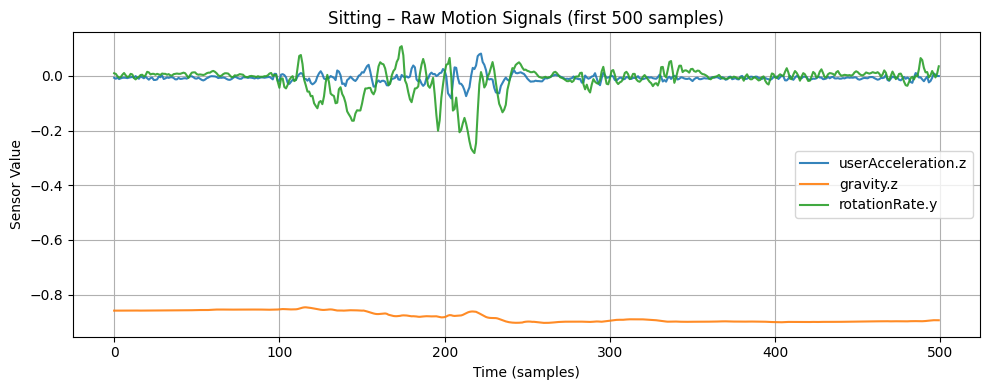

[Saved] /content/sit_plot.png
[Load] STD -> /content/data/archive/A_DeviceMotion_data/A_DeviceMotion_data/std_14/sub_1.csv


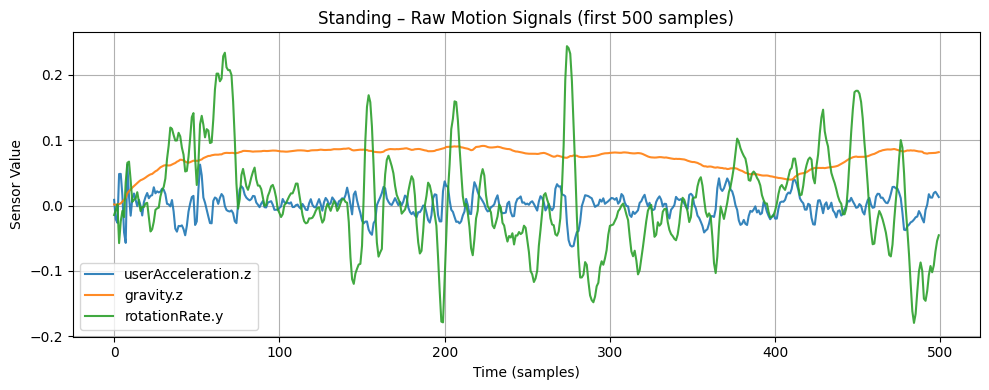

[Saved] /content/std_plot.png

✅ Done! All six activity plots displayed and saved in /content.


In [ ]:
# ===============================
# Motion Dataset: Plot 6 Activities (Final Version - No global variables)
# - For each activity label: loads one CSV, plots 3 signals (first 500 samples)
# - Displays and saves each plot as PNG in /content
# ===============================

import os
import glob
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

# -------- Settings --------
ZIP_NAME_CANDIDATES = [
    "/content/archive.zip",  # uploaded file
    "/content/archive.zip",  # fallback
]

EXTRACT_DIR = "/content/data"

# Activity labels and display names
LABELS = {
    "dws": "Downstairs",
    "ups": "Upstairs",
    "wlk": "Walking",
    "jog": "Jogging",
    "sit": "Sitting",
    "std": "Standing",
}

SIGNALS = ["userAcceleration.z", "gravity.z", "rotationRate.y"]
MAX_SAMPLES = 500  # samples to plot

# -------- Helper Functions --------
def unzip_dataset():
    """Unzip the archive and detect the main data folder path."""
    # If already extracted, try to locate it
    candidate_paths = glob.glob(
        os.path.join(EXTRACT_DIR, "**/A_DeviceMotion_data/A_DeviceMotion_data"),
        recursive=True,
    )
    if candidate_paths:
        print(f"[OK] Found existing extracted data at: {candidate_paths[0]}")
        return candidate_paths[0]

    # Otherwise, unzip
    zip_path = None
    for cand in ZIP_NAME_CANDIDATES:
        if os.path.isfile(cand):
            zip_path = cand
            break
    if not zip_path:
        raise FileNotFoundError("Upload your dataset ZIP (archive.zip) to /content first!")

    os.makedirs(EXTRACT_DIR, exist_ok=True)
    with zipfile.ZipFile(zip_path, "r") as zf:
        zf.extractall(EXTRACT_DIR)
    print(f"[OK] Unzipped: {zip_path} -> {EXTRACT_DIR}")

    # Locate nested folder
    candidate_paths = glob.glob(
        os.path.join(EXTRACT_DIR, "**/A_DeviceMotion_data/A_DeviceMotion_data"),
        recursive=True,
    )
    if not candidate_paths:
        raise FileNotFoundError("Could not find A_DeviceMotion_data/A_DeviceMotion_data after unzip.")
    print(f"[OK] Located data folder: {candidate_paths[0]}")
    return candidate_paths[0]


def find_sample_file_for_label(base_path: str, label: str) -> str:
    """Find a CSV sample for a given label."""
    p1 = os.path.join(base_path, f"{label}_1", "sub_1.csv")
    if os.path.isfile(p1):
        return p1
    pattern = os.path.join(base_path, f"{label}_*", "sub_*.csv")
    matches = sorted(glob.glob(pattern))
    if matches:
        return matches[0]
    raise FileNotFoundError(f"No CSV found for label '{label}' in {base_path}")


def plot_activity(df: pd.DataFrame, label_code: str, title_name: str, save_dir="/content"):
    """Plot and save the signals for a given activity."""
    missing = [col for col in SIGNALS if col not in df.columns]
    if missing:
        raise KeyError(f"Missing columns in CSV for {label_code}: {missing}")

    n = min(MAX_SAMPLES, len(df))
    plt.figure(figsize=(10, 4))
    for col in SIGNALS:
        plt.plot(df[col].iloc[:n], label=col, alpha=0.9)

    plt.title(f"{title_name} – Raw Motion Signals (first {n} samples)")
    plt.xlabel("Time (samples)")
    plt.ylabel("Sensor Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    out_path = os.path.join(save_dir, f"{label_code}_plot.png")
    plt.savefig(out_path, dpi=150)
    plt.show()
    print(f"[Saved] {out_path}")


# -------- Run all steps --------
data_path = unzip_dataset()

for code, name in LABELS.items():
    try:
        csv_path = find_sample_file_for_label(data_path, code)
        print(f"[Load] {code.upper()} -> {csv_path}")
        df = pd.read_csv(csv_path)
        plot_activity(df, code, name)
    except Exception as e:
        print(f"[Skip] {code.upper()} due to error: {e}")

print("\n✅ Done! All six activity plots displayed and saved in /content.")
